In [1]:
import sys
sys.path.append("../")
import helper

from datetime import datetime as dt
from pandas import read_excel, to_datetime, DataFrame, merge
from matplotlib import pyplot as plt
import seaborn as sb
from pca import pca # 주성분 분석 결과를 DataFrame으로 확인할 수 있는 기능을 제공하는 패키지

In [3]:
origin = read_excel("../Excel Data/2023년_8월말_인구현황_최종수정.xlsx")
origin.head()

,구분,행정구별_공영주차장_주차면수,행정구별_공영주차장_유무,행정구별_공원수,행정구별_사업체수,행정구별_자동차_등록현황,전체인구,전체인구비율(%),내국인_계,지역별\n내국인 비율,...,여,구성비(여)(%),외국인 계,지역별\n외국인 비율,전월대비증감(계),외국인 남,외국인 여,세대수\n(외국인제외),전월대비증감(계).1,세대당_인구
0,계,1625,NaN,70,28490,197139,391511,1.000,385953,1.0000,...,193682,50.18,5558,1.000,4상승,3377,2181,160439,123하락,2.41
1,조치원읍,374,y,16,5141,21246,43324,0.113,41680,0.1082,...,19982,5.18,1644,0.296,11하락,849,795,20633,29하락,2.02
2,연기면,0,n,1,437,1677,2628,0.007,2555,0.0066,...,1091,0.28,73,0.013,7하락,49,24,1543,15하락,1.66
3,연동면,0,n,0,529,2125,3078,0.008,2896,0.0075,...,1388,0.36,182,0.033,2상승,150,32,1672,9하락,1.73
4,부강면,0,n,1,1345,4515,5966,0.015,5671,0.0147,...,2539,0.66,295,0.053,4하락,244,51,3166,21하락,1.79


In [3]:
df=origin.copy()
df.head()

,구분,행정구별_공영주차장_주차면수,행정구별_공영주차장_유무,행정구별_공원수,행정구별_사업체수,행정구별_자동차_등록현황,전체인구,전체인구비율(%),내국인_계,지역별\n내국인 비율,...,여,구성비(여)(%),외국인 계,지역별\n외국인 비율,전월대비증감(계),외국인 남,외국인 여,세대수\n(외국인제외),전월대비증감(계).1,세대당_인구
0,계,1625,NaN,70,28490,197139,391511,1.000,385953,1.0000,...,193682,50.18,5558,1.000,4상승,3377,2181,160439,123하락,2.41
1,조치원읍,374,y,16,5141,21246,43324,0.113,41680,0.1082,...,19982,5.18,1644,0.296,11하락,849,795,20633,29하락,2.02
2,연기면,0,n,1,437,1677,2628,0.007,2555,0.0066,...,1091,0.28,73,0.013,7하락,49,24,1543,15하락,1.66
3,연동면,0,n,0,529,2125,3078,0.008,2896,0.0075,...,1388,0.36,182,0.033,2상승,150,32,1672,9하락,1.73
4,부강면,0,n,1,1345,4515,5966,0.015,5671,0.0147,...,2539,0.66,295,0.053,4하락,244,51,3166,21하락,1.79


In [6]:
# 필요한 컬럼만 필터 함수로 추출
df1=df.filter(['구분','행정구별_공영주차장_주차면수','행정구별_공영주차장_유무','행정구별_공원수','행정구별_사업체수','행정구별_자동차_등록현황','전체인구'])
df1.head()

,구분,행정구별_공영주차장_주차면수,행정구별_공영주차장_유무,행정구별_공원수,행정구별_사업체수,행정구별_자동차_등록현황,전체인구
0,계,1625,NaN,70,28490,197139,391511
1,조치원읍,374,y,16,5141,21246,43324
2,연기면,0,n,1,437,1677,2628
3,연동면,0,n,0,529,2125,3078
4,부강면,0,n,1,1345,4515,5966


In [7]:
# 계 행 삭제
df1.drop(df.index[0],inplace=True)
df1

,구분,행정구별_공영주차장_주차면수,행정구별_공영주차장_유무,행정구별_공원수,행정구별_사업체수,행정구별_자동차_등록현황,전체인구
1,조치원읍,374,y,16,5141,21246,43324
2,연기면,0,n,1,437,1677,2628
3,연동면,0,n,0,529,2125,3078
4,부강면,0,n,1,1345,4515,5966
5,금남면,0,n,2,1338,5383,8794
6,장군면,0,n,0,1176,5051,7184
7,연서면,0,n,0,1088,4598,7261
8,전의면,0,n,0,1182,3795,5864
9,전동면,0,n,0,477,2210,3450
10,소정면,0,n,0,504,1802,2426


In [47]:
# #전체인구비율 컬럼 자릿수 올림
# df1['전체인구비율(%)'] = df1['전체인구비율(%)'].map("{:.1%}".format)
# df1

In [8]:
# 파생 변수 생성(범주형)
df1['대도시여부_2만명이상']=df1['전체인구']>20000
df1

,구분,행정구별_공영주차장_주차면수,행정구별_공영주차장_유무,행정구별_공원수,행정구별_사업체수,행정구별_자동차_등록현황,전체인구,대도시여부_2만명이상
1,조치원읍,374,y,16,5141,21246,43324,True
2,연기면,0,n,1,437,1677,2628,False
3,연동면,0,n,0,529,2125,3078,False
4,부강면,0,n,1,1345,4515,5966,False
5,금남면,0,n,2,1338,5383,8794,False
6,장군면,0,n,0,1176,5051,7184,False
7,연서면,0,n,0,1088,4598,7261,False
8,전의면,0,n,0,1182,3795,5864,False
9,전동면,0,n,0,477,2210,3450,False
10,소정면,0,n,0,504,1802,2426,False


In [9]:
#대도시여부 범주형을 명목형으로 변경
df1['대도시여부_2만명이상'] = df1['대도시여부_2만명이상'].replace({True: 1, False: 0})
df1

,구분,행정구별_공영주차장_주차면수,행정구별_공영주차장_유무,행정구별_공원수,행정구별_사업체수,행정구별_자동차_등록현황,전체인구,대도시여부_2만명이상
1,조치원읍,374,y,16,5141,21246,43324,1
2,연기면,0,n,1,437,1677,2628,0
3,연동면,0,n,0,529,2125,3078,0
4,부강면,0,n,1,1345,4515,5966,0
5,금남면,0,n,2,1338,5383,8794,0
6,장군면,0,n,0,1176,5051,7184,0
7,연서면,0,n,0,1088,4598,7261,0
8,전의면,0,n,0,1182,3795,5864,0
9,전동면,0,n,0,477,2210,3450,0
10,소정면,0,n,0,504,1802,2426,0


In [10]:
#대도시여부 범주형을 명목형으로 변경
df1['행정구별_공영주차장_유무'] = df1['행정구별_공영주차장_유무'].replace({'y': 1, 'n': 0})
df1

,구분,행정구별_공영주차장_주차면수,행정구별_공영주차장_유무,행정구별_공원수,행정구별_사업체수,행정구별_자동차_등록현황,전체인구,대도시여부_2만명이상
1,조치원읍,374,1,16,5141,21246,43324,1
2,연기면,0,0,1,437,1677,2628,0
3,연동면,0,0,0,529,2125,3078,0
4,부강면,0,0,1,1345,4515,5966,0
5,금남면,0,0,2,1338,5383,8794,0
6,장군면,0,0,0,1176,5051,7184,0
7,연서면,0,0,0,1088,4598,7261,0
8,전의면,0,0,0,1182,3795,5864,0
9,전동면,0,0,0,477,2210,3450,0
10,소정면,0,0,0,504,1802,2426,0


In [42]:
# tmp = df1.copy()
# tmp = df1['대도시여부(2만명이상)'].replace("대도시여부_2만명이상")
# tmp.head()

1    1
2    0
3    0
4    0
5    0
Name: 대도시여부_2만명이상, dtype: int64

In [12]:
df1.set_index('구분',inplace=True)
df1

,행정구별_공영주차장_주차면수,행정구별_공영주차장_유무,행정구별_공원수,행정구별_사업체수,행정구별_자동차_등록현황,전체인구,대도시여부_2만명이상
구분,,,,,,,
조치원읍,374,1,16,5141,21246,43324,1
연기면,0,0,1,437,1677,2628,0
연동면,0,0,0,529,2125,3078,0
부강면,0,0,1,1345,4515,5966,0
금남면,0,0,2,1338,5383,8794,0
장군면,0,0,0,1176,5051,7184,0
연서면,0,0,0,1088,4598,7261,0
전의면,0,0,0,1182,3795,5864,0
전동면,0,0,0,477,2210,3450,0


In [13]:
df1.dtypes

행정구별_공영주차장_주차면수    int64
행정구별_공영주차장_유무      int64
행정구별_공원수           int64
행정구별_사업체수          int64
행정구별_자동차_등록현황      int64
전체인구               int64
대도시여부_2만명이상        int64
dtype: object

In [14]:
#기초 통계량 확인
df1.describe()

,행정구별_공영주차장_주차면수,행정구별_공영주차장_유무,행정구별_공원수,행정구별_사업체수,행정구별_자동차_등록현황,전체인구,대도시여부_2만명이상
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,67.708333,0.250000,2.916667,1187.083333,8214.125000,16312.958333,0.375000
std,149.113170,0.442326,5.081224,1183.636876,5248.553244,11613.511245,0.494535
min,0.000000,0.000000,0.000000,0.000000,1677.000000,2426.000000,0.000000
25%,0.000000,0.000000,0.000000,497.250000,4450.500000,6879.500000,0.000000
50%,0.000000,0.000000,0.000000,1064.000000,6299.000000,12406.000000,0.000000
75%,3.250000,0.250000,2.750000,1360.750000,11473.500000,25870.750000,1.000000
max,572.000000,1.000000,16.000000,5141.000000,21246.000000,43324.000000,1.000000


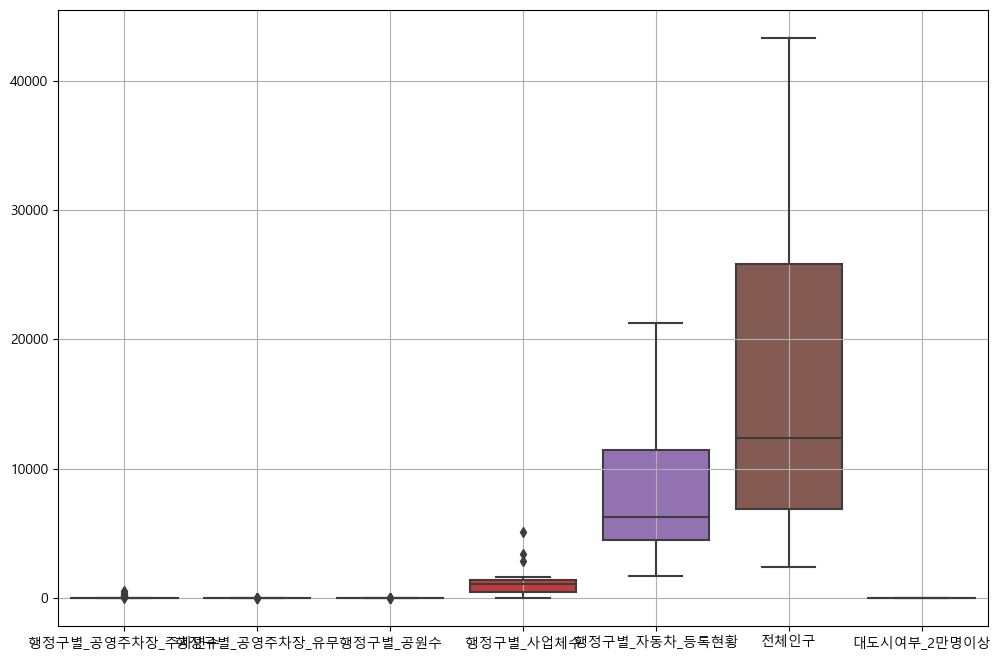

In [17]:
#boxplot 확인

plt.rcParams['font.family'] = 'Malgun Gothic'
#plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams['axes.unicode_minus'] = False

sb.boxplot(data=df1)
plt.grid()
plt.show()
plt.close()

In [ ]:
# 종속변수를 제외하더라도 독립변수간의 범위가 달라 표준화 필요해보임

In [18]:
cnames = []
dtypes = df1.dtypes

for i, v in enumerate(dtypes):
    if v != 'category':
        print(dtypes.index[i], dtypes[i])
        cnames.append(dtypes.index[i])
        
print(cnames)

행정구별_공영주차장_주차면수 int64
행정구별_공영주차장_유무 int64
행정구별_공원수 int64
행정구별_사업체수 int64
행정구별_자동차_등록현황 int64
전체인구 int64
대도시여부_2만명이상 int64
['행정구별_공영주차장_주차면수', '행정구별_공영주차장_유무', '행정구별_공원수', '행정구별_사업체수', '행정구별_자동차_등록현황', '전체인구', '대도시여부_2만명이상']


c:\Users\kiman\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 3000x2000 with 0 Axes>

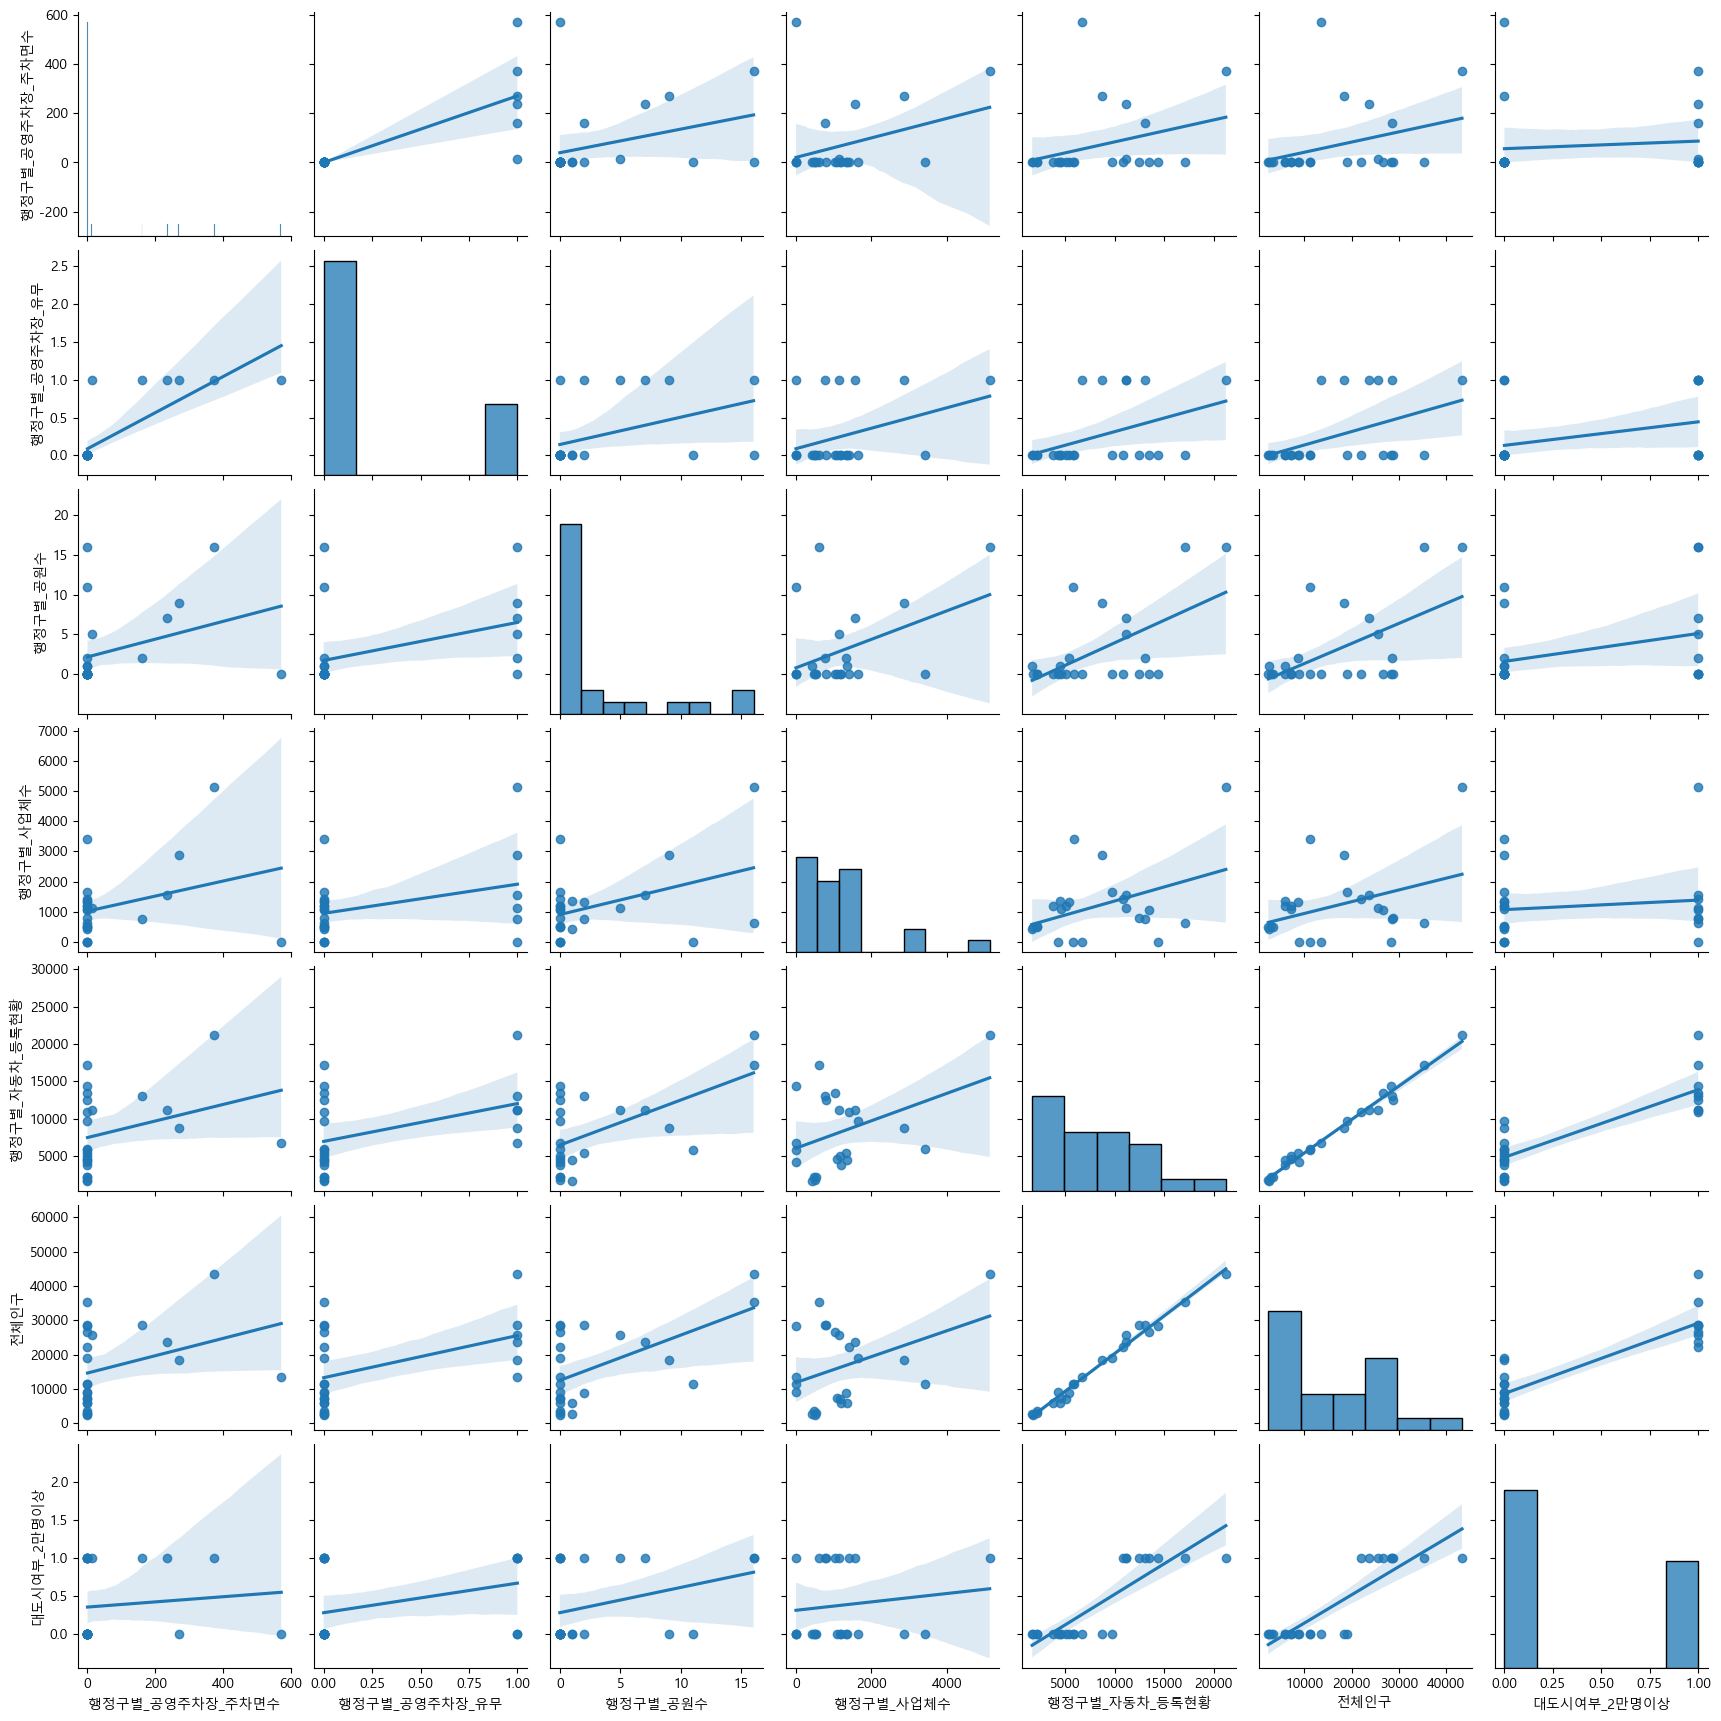

In [24]:
plt.figure(figsize=(30, 20))
sb.pairplot(data=df1, vars=cnames, kind='reg')
plt.show()
plt.close()

In [19]:
# 데이터 정규화 진행

x_train_std_df, y_train_std_df = helper.scalling(df1[cnames], '전체인구')
x_train_std_df.head()

,행정구별_공영주차장_주차면수,행정구별_공영주차장_유무,행정구별_공원수,행정구별_사업체수,행정구별_자동차_등록현황,대도시여부_2만명이상
0,2.098268,1.732051,2.630218,3.412328,2.536349,1.290994
1,-0.463840,-0.577350,-0.385319,-0.647340,-1.272298,-0.774597
2,-0.463840,-0.577350,-0.586354,-0.567942,-1.185105,-0.774597
3,-0.463840,-0.577350,-0.385319,0.136286,-0.719948,-0.774597
4,-0.463840,-0.577350,-0.184283,0.130245,-0.551012,-0.774597


In [20]:
# # 표준화 결과를 활용하여 주성분 분석 수행
model = pca()
fit = model.fit_transform(x_train_std_df)
topfeat = fit['topfeat']
topfeat

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


,PC,feature,loading,type
0,PC1,행정구별_자동차_등록현황,0.483361,best
1,PC2,대도시여부_2만명이상,-0.570756,best
2,PC3,행정구별_사업체수,-0.743481,best
3,PC4,행정구별_공원수,0.811828,best
4,PC2,행정구별_공영주차장_주차면수,0.564397,weak
5,PC1,행정구별_공영주차장_유무,0.446241,weak


In [21]:
merge_df = merge(x_train_std_df, y_train_std_df, left_index=True, right_index=True)
df3 = merge_df
df3.head()

,행정구별_공영주차장_주차면수,행정구별_공영주차장_유무,행정구별_공원수,행정구별_사업체수,행정구별_자동차_등록현황,대도시여부_2만명이상,전체인구
0,2.098268,1.732051,2.630218,3.412328,2.536349,1.290994,2.375853
1,-0.463840,-0.577350,-0.385319,-0.647340,-1.272298,-0.774597,-1.203709
2,-0.463840,-0.577350,-0.586354,-0.567942,-1.185105,-0.774597,-1.164128
3,-0.463840,-0.577350,-0.385319,0.136286,-0.719948,-0.774597,-0.910104
4,-0.463840,-0.577350,-0.184283,0.130245,-0.551012,-0.774597,-0.661357


In [22]:
x_train_std_df

,행정구별_공영주차장_주차면수,행정구별_공영주차장_유무,행정구별_공원수,행정구별_사업체수,행정구별_자동차_등록현황,대도시여부_2만명이상
0,2.098268,1.732051,2.630218,3.412328,2.536349,1.290994
1,-0.463840,-0.577350,-0.385319,-0.647340,-1.272298,-0.774597
2,-0.463840,-0.577350,-0.586354,-0.567942,-1.185105,-0.774597
3,-0.463840,-0.577350,-0.385319,0.136286,-0.719948,-0.774597
4,-0.463840,-0.577350,-0.184283,0.130245,-0.551012,-0.774597
5,-0.463840,-0.577350,-0.586354,-0.009565,-0.615628,-0.774597
6,-0.463840,-0.577350,-0.586354,-0.085511,-0.703794,-0.774597
7,-0.463840,-0.577350,-0.586354,-0.004387,-0.860079,-0.774597
8,-0.463840,-0.577350,-0.586354,-0.612819,-1.168562,-0.774597
9,-0.463840,-0.577350,-0.586354,-0.589518,-1.247970,-0.774597


In [23]:
ols_result = helper.myOls(df3, y='전체인구', x = ['행정구별_공영주차장_주차면수', '행정구별_공영주차장_유무', '행정구별_공원수', '행정구별_사업체수', '행정구별_자동차_등록현황','대도시여부_2만명이상'])
print(ols_result.summary)

                            OLS Regression Results                            
Dep. Variable:                   전체인구   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     336.7
Date:                Mon, 25 Sep 2023   Prob (F-statistic):           1.06e-16
Time:                        14:09:19   Log-Likelihood:                 23.379
No. Observations:                  24   AIC:                            -32.76
Df Residuals:                      17   BIC:                            -24.51
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.388e-17      0.022   6.

In [25]:
ols_result.table

B   표준오차         β        t   유의확률         VIF
종속변수 독립변수                                                                 
전체인구 행정구별_공영주차장_주차면수  -0.0412  0.045 -0.041176  -0.919*  0.371    4.290909
     행정구별_공영주차장_유무     0.0944  0.047  0.094396   2.028*  0.059    5.480688
     행정구별_공원수          0.0018  0.031  0.001829   0.059*  0.954    1.947145
     행정구별_사업체수        -0.0297  0.029 -0.029731  -1.026*  0.319    1.816494
     행정구별_자동차_등록현황     0.9288  0.068  0.928774  13.608*  0.000  112.866761
     대도시여부_2만명이상       0.0562  0.061  0.056185   0.921*  0.370    7.963674

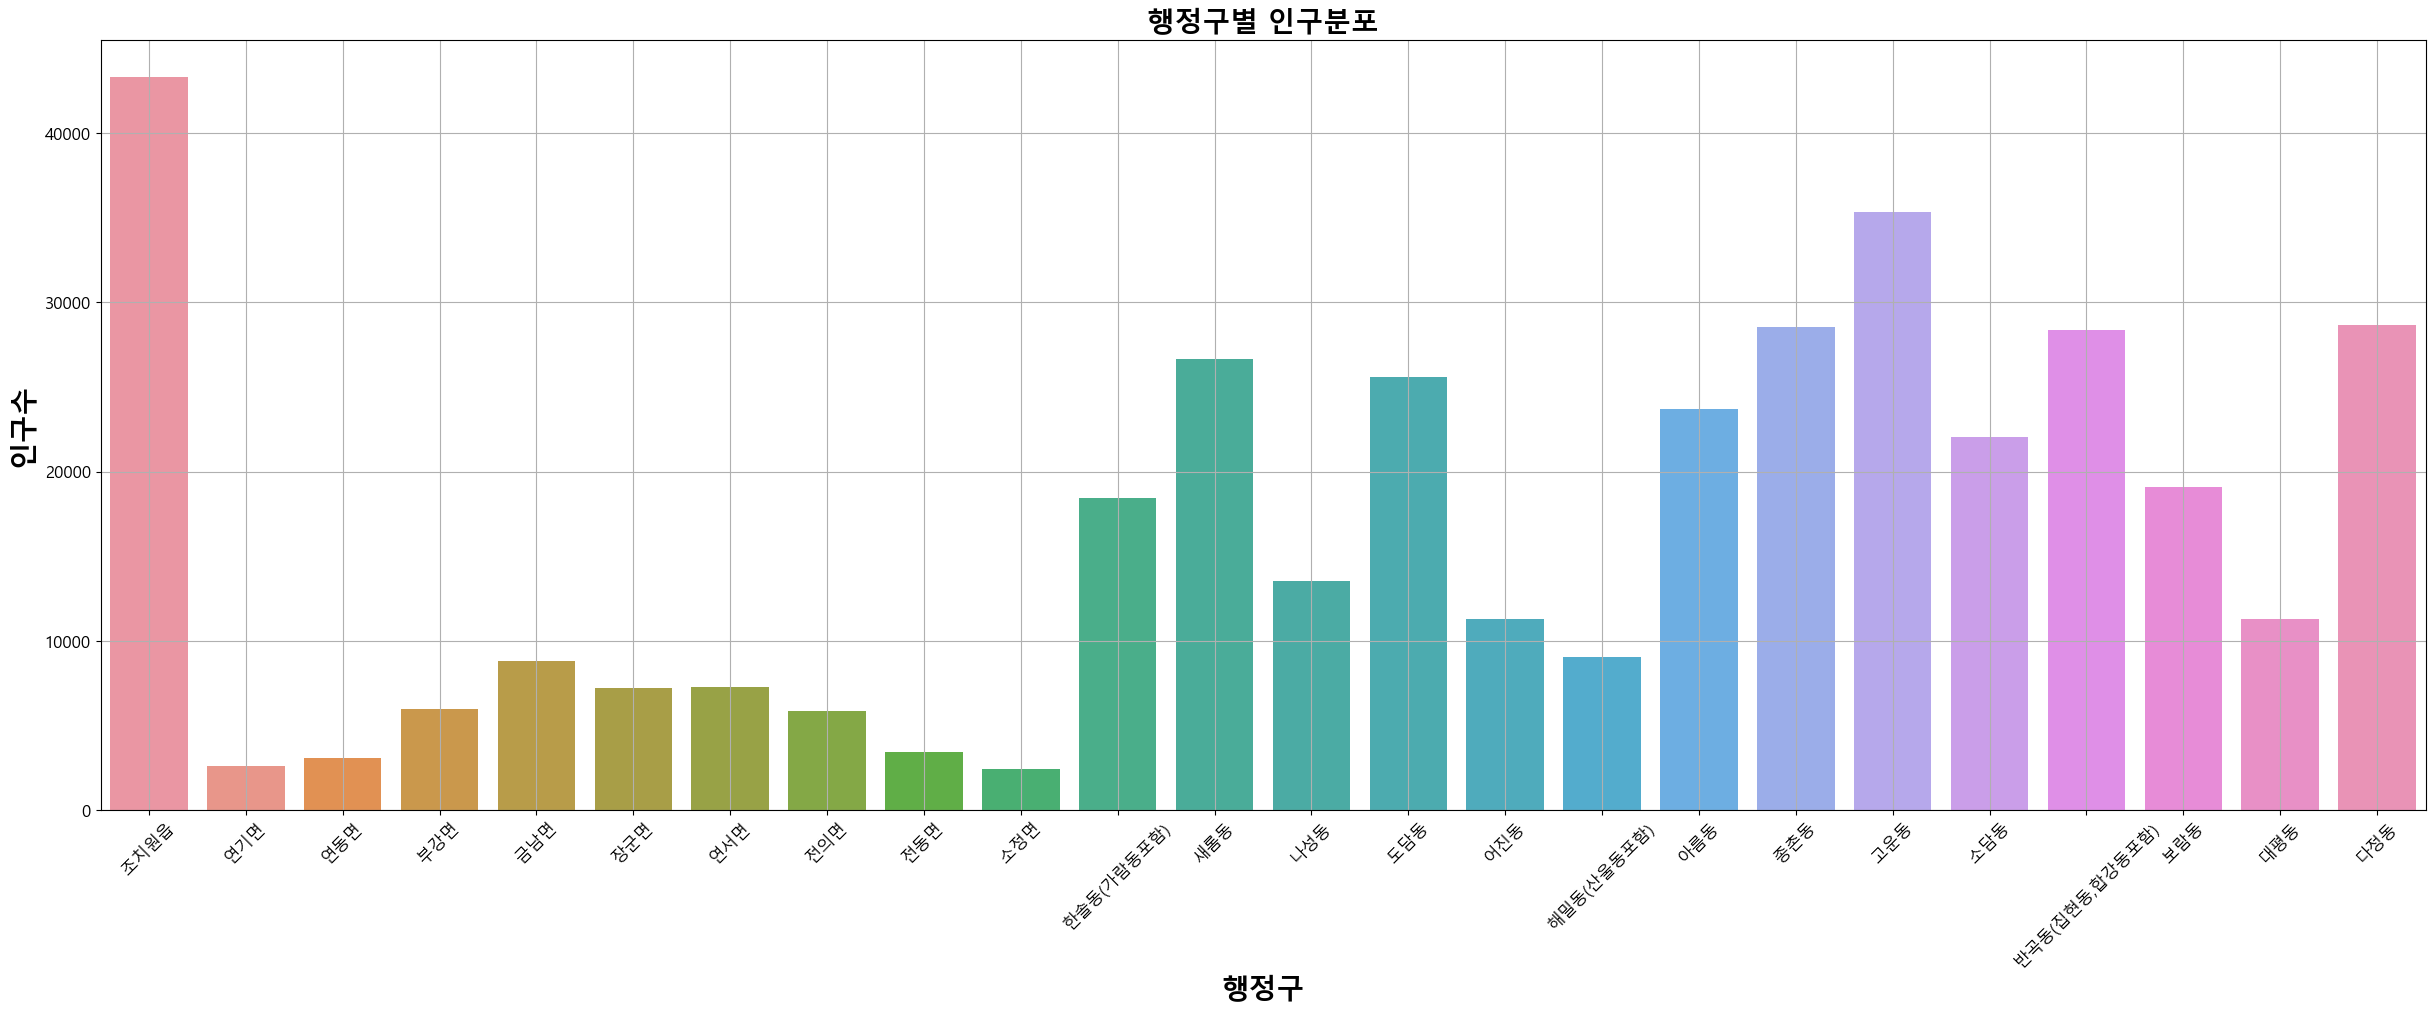

In [41]:
plt.rcParams["font.family"] = 'Malgun Gothic'
#plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (30, 10)
plt.rcParams["axes.unicode_minus"] = False

sb.barplot(x=df1['구분'],y=df1['전체인구'])

plt.title("행정구별 인구분포",fontsize=20, fontweight='bold')     #그래프 제목
plt.xlabel("행정구",fontsize=20, fontweight='bold') #x축 제목
plt.ylabel("인구수",fontsize=20, fontweight='bold') #y축 제목
plt.xticks(rotation=45)
plt.grid() #격자표시
plt.show() #그래프 화면 표시
plt.close() #그래프 그리기 종료